Using pickle to predict unknown data.

In [3]:
#Main program

#clean the memory
#in ipython
%reset -f 

#in python
import gc
gc.collect()

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy import stats

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
#show plots in the Jupyter Notebook
%matplotlib inline
#configure visualization defaults
sns.set(style='white', context='notebook', palette='deep')
sns.set_style('white')


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ClassPredictionError
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

#these piece of codes are learned from the Data Sciences Certficate course

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import precision_score

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

import pickle

In [4]:
# Imports - you'll need some of these later, but it's traditional to put them all at the beginning.
# Downloading from the data server only need once.

import os
import csv
import json

#from collections import Counter
from operator import itemgetter
from requests import get


def download(download_url, output_file):
    """
    Downloads a URL and writes it to the specified path. The "path" 
    is like the mailing address for the file - it tells the function 
    where on your computer to send it!
    
    Also note the use of "with" to automatically close files - this 
    is a good standard practice to follow.
    """
    with open(output_file,'wb') as f:
        response = get(download_url)
        f.write(response.content)
        
        
## Write the Python to execute the function and download the file here:
url = "http://ftp.ncbi.nlm.nih.gov/geo/series/FSE/113nnn/GSE113486/matrix/GSE112264_series_matrix.txt.gz"
path = "C:/BigData/DSCert/input/GSE112264_series_matrix.txt.gz"


#Acquire data
#The Python Pandas packages helps us work with our datasets. We start by acquiring the "master" data generated by computer
#we will split the data into training and testing datasets later.
#
#downloaded master file for this project: 

bladder_cancer_file = "C:/Users/Liu_PC/Documents/Georgetown/GSE113486_series_matrix.txt"

#df1 = pd.read_csv(bladder_cancer_file, delimiter="\t",skiprows = 0,  header = None) 

#disease_status = df1.iloc[[46],:]

#df3 =pd.concat([df.iloc[[25],:], df.iloc[[2],:], df.drop([2, 25], axis=0)], axis=0)

#print(disease_status)
#df = pd.read_csv(bladder_cancer_file, delimiter="\t", skiprows = 73)
#df.shape
ro1 = list(range(0,50))
ro2 = list(range(51,73))
d =  ro1 +  ro2
print(d)
 
df = pd.read_csv(bladder_cancer_file, delimiter="\t", skiprows = d, skipfooter =1, header = None, engine ='python') 
#df = pd.read_csv(bladder_cancer_file, delimiter="\t", skiprows =50, skipfooter =1, header = None, engine ='python') 

df.head(20)
#df3 = df3.drop([5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24], axis=0) 


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972
0,!Sample_characteristics_ch1,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,...,disease status: Pancreatic Cancer,disease status: Pancreatic Cancer,disease status: Pancreatic Cancer,disease status: Pancreatic Cancer,disease status: Pancreatic Cancer,disease status: Pancreatic Cance

In [5]:
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972
2562,MIMAT0032116,6.507,5.946,6.058,6.315,6.788,6.825,5.517,6.913,6.598,6.438,6.375,7.244,6.945,7.055,2.033,7.192,6.633,6.304,8.199,7.353,5.964,5.989,7.659,6.740,5.694,4.501,5.932,6.779,6.421,7.055,7.186,6.685,6.258,7.063,6.640,6.600,5.785,6.526,7.117,6.604,5.137,5.644,7.009,6.991,6.124,7.204,7.529,6.032,5.830,7.572,6.405,6.478,6.395,6.582,6.734,6.744,5.332,7.147,5.239,5.999,7.621,5.965,6.706,6.481,6.328,5.338,6.412,7.084,6.643,6.416,6.437,5.621,5.076,6.577,6.658,-0.094,6.709,5.952,7.118,6.717,6.231,7.048,5.867,2.946,5.697,6.654,5.983,6.437,5.867,6.879,6.005,7.213,6.578,7.014,5.992,6.045,6.530,5.630,6.242,...,8.221,5.928,6.542,4.905,5.639,5.655,4.008,5.838,4.790,6.063,6.577,6.263,5.848,6.107,5.919,8.023,6.882,6.807,5.948,6.455,6.936,6.092,0.150,5.509,6.235,6.311,5.758,6.191,6.245,6.591,5.300,6.687,6.780,7.008,6.588,5.034,5.998,6.118,6.063,7.043,6.729,6.424,1.432,5.420,7.074,7.352,6.756,6.303,5.748,6.522,6.770,6.904,5.790,6.057,5.753,6.108,4.909,7.018,6.118,5.489,6.841,6.180,6.438,7.334,3.944,6.247,6.027,6.717,6.256,4.480,6.918,5.203,5.332,5.716,5.899,4.976,5.990,6.148,6.276,6.173,5.519,6.288,6.348,5.421,6.172,6.288,5.113,5.273,5.785,8.143,7.284,6.564,6.383,7.050,1.765,4.981,6.421,5.860,4.031,6.317
2563,MIMAT0033692,3.906,0.765,4.482,2.759,6.695,4.682,1.510,4.670,6.062,0.801,4.177,5.342,6.195,7.070,2.033,1.490,2.836,5.325,6.567,2.030,1.528,6.493,7.043,6.004,4.357,3.117,6.403,6.706,3.217,0.112,1.289,7.333,6.778,6.425,6.605,4.988,7.076,5.346,5.637,0.912,5.974,4.314,5.068,6.484,5.238,6.066,6.269,5.665,0.419,4.521,5.720,5.939,3.480,4.400,5.668,5.302,4.388,0.690,4.339,0.085,0.804,1.863,1.008,5.351,4.108,0.299,-0.191,2.067,5.132,5.647,6.832,1.196,0.387,5.399,7.509,7.140,3.700,5.887,2.293,5.283,3.906,4.635,4.556,3.441,6.568,5.671,3.648,5.057,-0.814,4.778,4.904,3.515,6.775,4.774,5.401,5.148,5.861,5.898,5.985,...,4.275,5.309,6.319,7.423,6.075,5.557,-0.366,5.060,3.741,6.288,6.074,5.509,4.933,5.108,4.939,8.023,4.977,5.060,4.117,5.192,5.353,5.425,6.800,4.889,5.589,5.781,5.135,5.597,5.832,6.006,3.183,6.207,5.997,6.385,5.756,4.337,6.072,6.322,6.211,5.476,5.436,5.153,5.881,5.358,4.738,5.200,5.283,5.270,5.463,6.332,6.110,5.831,6.083,5.685,4.587,4.008,5.390,5.722,4.783,5.453,6.151,6.116,5.189,2.708,3.944,4.764,5.702,1.179,5.672,0.337,4.754,-0.028,1.028,4.913,5.171,5.760,4.403,3.774,5.680,6.218,5.313,5.346,5.509,5.975,-0.808,4.228,5.630,5.638,5.261,5.791,3.917,4.416,7.126,4.918,5.306,5.108,5.440,7.004,0.071,5.534
2564,MIMAT0035542,-1.061,0.765,2.917,5.028,5.987,-0.486,4.643,1.320,3.480,0.801,0.820,5.649,6.440,1.887,6.882,6.889,0.864,5.470,6.235,2.030,5.726,5.369,1.991,0.908,5.851,0.971,1.140,0.500,0.716,0.112,6.063,0.513,0.699,4.755,1.497,2.760,0.942,4.480,4.266,0.912,5.379,3.586,5.784,6.794,0.492,3.977,5.243,0.652,4.731,5.420,5.086,5.311,-0.017,5.053,2.044,0.455,3.104,0.690,3.631,2.421,0.804,0.182,4.465,4.374,0.000,0.299,-0.191,-0.245,-0.008,4.910,4.452,0.044,0.387,-0.542,4.612,7.445,0.475,5.945,6.201,2.707,-1.183,4.800,-0.959,-0.137,1.706,3.749,4.126,4.950,-0.814,-1.030,-0.329,-0.577,1.743,0.982,3.975,-0.814,2.203,1.542,3.618,...,5.140,-0.457,5.957,6.793,4.121,1.753,-0.366,-1.499,0.309,-0.305,4.046,4.107,2.882,4.219,0.699,8.023,4.226,4.207,0.134,4.150,3.599,2.735,0.150,2.794,0.138,2.311,-1.413,3.942,2.667,4.158,5.171,0.990,3.906,3.182,4.706,2.708,0.090,4.688,-0.

In [6]:
df1 = df.T

df1.loc[0, 0] = 'Cancer_type'

df1.loc[0, 1] = 'Sample_ID'



In [7]:
del df

#now the dataframe is indexable
new_header = df1.iloc[0] #grab the first row for the header
df1 = df1[1:] #take the data less the header row
df1.columns = new_header 

df1.to_csv("Bladder_CancerTestingSet.CleanedData.csv", sep="\t", index = False)


#df3 =pd.concat([df.iloc[[25],:], df.iloc[[2],:], df.drop([2, 25], axis=0)], axis=0)

#print(disease_status)
df1.head(10)

,Cancer_type,Sample_ID,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000071,MIMAT0000072,MIMAT0000073,MIMAT0000074,MIMAT0000075,MIMAT0000076,MIMAT0000077,MIMAT0000078,MIMAT0000079,MIMAT0000080,MIMAT0000081,MIMAT0000082,MIMAT0000083,MIMAT0000084,MIMAT0000085,MIMAT0000086,MIMAT0000087,MIMAT0000088,MIMAT0000089,MIMAT0000090,MIMAT0000091,MIMAT0000092,MIMAT0000093,MIMAT0000094,MIMAT0000095,MIMAT0000096,MIMAT0000097,MIMAT0000098,MIMAT0000099,MIMAT0000100,MIMAT0000101,MIMAT0000102,MIMAT0000103,MIMAT0000104,MIMAT0000222,MIMAT0000226,MIMAT0000227,MIMAT0000228,MIMAT0000231,"MIMAT0000232, MIMAT0004563",MIMAT0000241,MIMAT0000242,MIMAT0000243,MIMAT0000244,MIMAT0000245,MIMAT0000250,MIMAT0000251,MIMAT0000252,MIMAT0000253,MIMAT0000254,MIMAT0000255,MIMAT0000256,MIMAT0000257,MIMAT0000258,MIMAT0000259,MIMAT0000260,MIMAT0000261,MIMAT0000262,MIMAT0000263,MIMAT0000264,MIMAT0000265,MIMAT0000266,MIMAT0000267,MIMAT0000268,MIMAT0000269,MIMAT0000270,MIMAT0000271,MIMAT0000272,MIMAT0000273,MIMAT0000274,MIMAT0000275,MIMAT0000276,MIMAT0000278,MIMAT0000279,MIMAT0000280,MIMAT0000281,MIMAT0000318,MIMAT0000414,MIMAT0000415,MIMAT0000416,MIMAT0000417,MIMAT0000418,MIMAT0000419,MIMAT0000420,MIMAT0000421,MIMAT0000422,MIMAT0000423,MIMAT0000424,MIMAT0000425,...,MIMAT0028225,MIMAT0028226,MIMAT0028227,MIMAT0028228,MIMAT0028229,MIMAT0028230,MIMAT0028231,MIMAT0028232,MIMAT0028233,MIMAT0028234,MIMAT0028235,MIMAT0029310,MIMAT0029782,MIMAT0030017,MIMAT0030018,MIMAT0030019,MIMAT0030020,MIMAT0030021,MIMAT0030411,MIMAT0030412,MIMAT0030413,MIMAT0030414,MIMAT0030415,MIMAT0030416,MIMAT0030417,MIMAT0030418,MIMAT0030419,MIMAT0030420,MIMAT0030421,MIMAT0030422,MIMAT0030423,MIMAT0030424,MIMAT0030425,MIMAT0030426,MIMAT0030427,MIMAT0030428,MIMAT0030429,MIMAT0030430,MIMAT0030431,MIMAT0030979,MIMAT0030980,MIMAT0030981,MIMAT0030982,MIMAT0030983,MIMAT0030984,MIMAT0030985,MIMAT0030986,MIMAT0030987,MIMAT0030988,MIMAT0030989,MIMAT0030990,MIMAT0030991,MIMAT0030992,MIMAT0030993,MIMAT0030994,MIMAT0030995,MIMAT0030996,MIMAT0030997,MIMAT0030998,MIMAT0030999,MIMAT0031000,MIMAT0031001,MIMAT0031002,MIMAT0031003,MIMAT0031004,MIMAT0031005,MIMAT0031006,MIMAT0031007,MIMAT0031008,MIMAT0031009,MIMAT0031010,MIMAT0031011,MIMAT0031012,MIMAT0031013,MIMAT0031014,MIMAT0031015,MIMAT0031016,MIMAT0031074,MIMAT0031095,MIMAT0031119,MIMAT0031120,MIMAT0031175,MIMAT0031176,MIMAT0031177,MIMAT0031178,MIMAT0031179,MIMAT0031180,MIMAT0031181,MIMAT0031890,MIMAT0031892,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,disease status: Bladder Cancer,GSM3106847,-1.061,-1.061,2.303,-1.061,2.972,4.457,-1.061,-1.061,4.129,5.821,-1.061,2.109,4.228,-1.061,-1.061,6.204,5.308,3.435,6.727,4.636,4.485,-1.061,-1.061,-1.061,2.710,0.926,4.740,2.054,3.974,3.086,7.300,1.989,-1.061,-1.061,3.912,2.978,3.196,-0.867,5.077,4.845,4.740,-1.061,5.448,3.830,-1.061,3.617,3.192,4.003,-1.061,-1.061,-0.754,-1.061,-1.061,4.017,-1.061,0.791,-1.061,-1.061,-1.061,0.297,2.629,4.152,3.084,3.894,4.574,4.341,-1.061,4.604,3.666,-1.061,1.871,4.838,4.947,-1.061,-1.061,0.748,2.826,3.569,-1.061,-1.061,-1.061,4.710,3.308,-1.061,-1.061,3.833,2.087,-1.061,-1.061,2.568,5.348,4.571,1.706,4.111,5.135,-1.061,-1.061,4.617,...,-1.061,-1.061,-1.061,-1.061,1.721,5.016,-0.740,-1.061,-1.061,-1.061,-1.061,-1.061,8.108,-1.061,-1.061,14.129,2.749,-1.061,3.555,-1.061,3.363,6.667,2.294,3.058,-1.061,-1.061,-1.061,6.200,5.909,6.113,-1.061,-1.061,-1.061,5.558,-1.061,1.825,5.405,1.781,3.168,6.095,-1.061,3.647,-1.061,-1.061,-1.061,-1.061,10.100,4.645,-1.061,-1.061,8.095,4.751,-1.061,-1.061,-1.061,-1.061,12.677,-1.061,7.027,13.242,7.298,-1.061,-1.061,-1.061,-1.061,2.051,-1.061,4.878,3.292,-1.061,-0.280,3.624,3.728,-1.061,0.774,-1.061,6.687,-1.061,12.302,6.057,3.968,-1.061,-1.061,3.565,8.408,-1.061,8.950,-1.061,-1.061,-1.061,-1.061,-1.061,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061
2,disease status: Bladder Cancer

In [8]:
df = pd.read_csv("Bladder_CancerTestingSet.CleanedData.csv", delimiter="\t") 
#df = df.T

df.head(10)


,Cancer_type,Sample_ID,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000071,MIMAT0000072,MIMAT0000073,MIMAT0000074,MIMAT0000075,MIMAT0000076,MIMAT0000077,MIMAT0000078,MIMAT0000079,MIMAT0000080,MIMAT0000081,MIMAT0000082,MIMAT0000083,MIMAT0000084,MIMAT0000085,MIMAT0000086,MIMAT0000087,MIMAT0000088,MIMAT0000089,MIMAT0000090,MIMAT0000091,MIMAT0000092,MIMAT0000093,MIMAT0000094,MIMAT0000095,MIMAT0000096,MIMAT0000097,MIMAT0000098,MIMAT0000099,MIMAT0000100,MIMAT0000101,MIMAT0000102,MIMAT0000103,MIMAT0000104,MIMAT0000222,MIMAT0000226,MIMAT0000227,MIMAT0000228,MIMAT0000231,"MIMAT0000232, MIMAT0004563",MIMAT0000241,MIMAT0000242,MIMAT0000243,MIMAT0000244,MIMAT0000245,MIMAT0000250,MIMAT0000251,MIMAT0000252,MIMAT0000253,MIMAT0000254,MIMAT0000255,MIMAT0000256,MIMAT0000257,MIMAT0000258,MIMAT0000259,MIMAT0000260,MIMAT0000261,MIMAT0000262,MIMAT0000263,MIMAT0000264,MIMAT0000265,MIMAT0000266,MIMAT0000267,MIMAT0000268,MIMAT0000269,MIMAT0000270,MIMAT0000271,MIMAT0000272,MIMAT0000273,MIMAT0000274,MIMAT0000275,MIMAT0000276,MIMAT0000278,MIMAT0000279,MIMAT0000280,MIMAT0000281,MIMAT0000318,MIMAT0000414,MIMAT0000415,MIMAT0000416,MIMAT0000417,MIMAT0000418,MIMAT0000419,MIMAT0000420,MIMAT0000421,MIMAT0000422,MIMAT0000423,MIMAT0000424,MIMAT0000425,...,MIMAT0028225,MIMAT0028226,MIMAT0028227,MIMAT0028228,MIMAT0028229,MIMAT0028230,MIMAT0028231,MIMAT0028232,MIMAT0028233,MIMAT0028234,MIMAT0028235,MIMAT0029310,MIMAT0029782,MIMAT0030017,MIMAT0030018,MIMAT0030019,MIMAT0030020,MIMAT0030021,MIMAT0030411,MIMAT0030412,MIMAT0030413,MIMAT0030414,MIMAT0030415,MIMAT0030416,MIMAT0030417,MIMAT0030418,MIMAT0030419,MIMAT0030420,MIMAT0030421,MIMAT0030422,MIMAT0030423,MIMAT0030424,MIMAT0030425,MIMAT0030426,MIMAT0030427,MIMAT0030428,MIMAT0030429,MIMAT0030430,MIMAT0030431,MIMAT0030979,MIMAT0030980,MIMAT0030981,MIMAT0030982,MIMAT0030983,MIMAT0030984,MIMAT0030985,MIMAT0030986,MIMAT0030987,MIMAT0030988,MIMAT0030989,MIMAT0030990,MIMAT0030991,MIMAT0030992,MIMAT0030993,MIMAT0030994,MIMAT0030995,MIMAT0030996,MIMAT0030997,MIMAT0030998,MIMAT0030999,MIMAT0031000,MIMAT0031001,MIMAT0031002,MIMAT0031003,MIMAT0031004,MIMAT0031005,MIMAT0031006,MIMAT0031007,MIMAT0031008,MIMAT0031009,MIMAT0031010,MIMAT0031011,MIMAT0031012,MIMAT0031013,MIMAT0031014,MIMAT0031015,MIMAT0031016,MIMAT0031074,MIMAT0031095,MIMAT0031119,MIMAT0031120,MIMAT0031175,MIMAT0031176,MIMAT0031177,MIMAT0031178,MIMAT0031179,MIMAT0031180,MIMAT0031181,MIMAT0031890,MIMAT0031892,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
0,disease status: Bladder Cancer,GSM3106847,-1.061,-1.061,2.303,-1.061,2.972,4.457,-1.061,-1.061,4.129,5.821,-1.061,2.109,4.228,-1.061,-1.061,6.204,5.308,3.435,6.727,4.636,4.485,-1.061,-1.061,-1.061,2.710,0.926,4.740,2.054,3.974,3.086,7.300,1.989,-1.061,-1.061,3.912,2.978,3.196,-0.867,5.077,4.845,4.740,-1.061,5.448,3.830,-1.061,3.617,3.192,4.003,-1.061,-1.061,-0.754,-1.061,-1.061,4.017,-1.061,0.791,-1.061,-1.061,-1.061,0.297,2.629,4.152,3.084,3.894,4.574,4.341,-1.061,4.604,3.666,-1.061,1.871,4.838,4.947,-1.061,-1.061,0.748,2.826,3.569,-1.061,-1.061,-1.061,4.710,3.308,-1.061,-1.061,3.833,2.087,-1.061,-1.061,2.568,5.348,4.571,1.706,4.111,5.135,-1.061,-1.061,4.617,...,-1.061,-1.061,-1.061,-1.061,1.721,5.016,-0.740,-1.061,-1.061,-1.061,-1.061,-1.061,8.108,-1.061,-1.061,14.129,2.749,-1.061,3.555,-1.061,3.363,6.667,2.294,3.058,-1.061,-1.061,-1.061,6.200,5.909,6.113,-1.061,-1.061,-1.061,5.558,-1.061,1.825,5.405,1.781,3.168,6.095,-1.061,3.647,-1.061,-1.061,-1.061,-1.061,10.100,4.645,-1.061,-1.061,8.095,4.751,-1.061,-1.061,-1.061,-1.061,12.677,-1.061,7.027,13.242,7.298,-1.061,-1.061,-1.061,-1.061,2.051,-1.061,4.878,3.292,-1.061,-0.280,3.624,3.728,-1.061,0.774,-1.061,6.687,-1.061,12.302,6.057,3.968,-1.061,-1.061,3.565,8.408,-1.061,8.950,-1.061,-1.061,-1.061,-1.061,-1.061,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061
1,disease status: Bladder Cancer

In [9]:

df['Cancer_type'] = df['Cancer_type'].str.replace('disease status: ', '')

df = df.set_index("Sample_ID")

df['Cancer_type'] = df['Cancer_type'].map(lambda x: 1 if x == "Bladder Cancer" else (0 if x == "Non-cancer control" else 2 )).astype(int)




#print(disease_status)

#df['Cancer_type'] = df['Cancer_type'].str.replace('disease status: ', '')


In [10]:
del df1
df.head(10)

,Cancer_type,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000071,MIMAT0000072,MIMAT0000073,MIMAT0000074,MIMAT0000075,MIMAT0000076,MIMAT0000077,MIMAT0000078,MIMAT0000079,MIMAT0000080,MIMAT0000081,MIMAT0000082,MIMAT0000083,MIMAT0000084,MIMAT0000085,MIMAT0000086,MIMAT0000087,MIMAT0000088,MIMAT0000089,MIMAT0000090,MIMAT0000091,MIMAT0000092,MIMAT0000093,MIMAT0000094,MIMAT0000095,MIMAT0000096,MIMAT0000097,MIMAT0000098,MIMAT0000099,MIMAT0000100,MIMAT0000101,MIMAT0000102,MIMAT0000103,MIMAT0000104,MIMAT0000222,MIMAT0000226,MIMAT0000227,MIMAT0000228,MIMAT0000231,"MIMAT0000232, MIMAT0004563",MIMAT0000241,MIMAT0000242,MIMAT0000243,MIMAT0000244,MIMAT0000245,MIMAT0000250,MIMAT0000251,MIMAT0000252,MIMAT0000253,MIMAT0000254,MIMAT0000255,MIMAT0000256,MIMAT0000257,MIMAT0000258,MIMAT0000259,MIMAT0000260,MIMAT0000261,MIMAT0000262,MIMAT0000263,MIMAT0000264,MIMAT0000265,MIMAT0000266,MIMAT0000267,MIMAT0000268,MIMAT0000269,MIMAT0000270,MIMAT0000271,MIMAT0000272,MIMAT0000273,MIMAT0000274,MIMAT0000275,MIMAT0000276,MIMAT0000278,MIMAT0000279,MIMAT0000280,MIMAT0000281,MIMAT0000318,MIMAT0000414,MIMAT0000415,MIMAT0000416,MIMAT0000417,MIMAT0000418,MIMAT0000419,MIMAT0000420,MIMAT0000421,MIMAT0000422,MIMAT0000423,MIMAT0000424,MIMAT0000425,MIMAT0000426,...,MIMAT0028225,MIMAT0028226,MIMAT0028227,MIMAT0028228,MIMAT0028229,MIMAT0028230,MIMAT0028231,MIMAT0028232,MIMAT0028233,MIMAT0028234,MIMAT0028235,MIMAT0029310,MIMAT0029782,MIMAT0030017,MIMAT0030018,MIMAT0030019,MIMAT0030020,MIMAT0030021,MIMAT0030411,MIMAT0030412,MIMAT0030413,MIMAT0030414,MIMAT0030415,MIMAT0030416,MIMAT0030417,MIMAT0030418,MIMAT0030419,MIMAT0030420,MIMAT0030421,MIMAT0030422,MIMAT0030423,MIMAT0030424,MIMAT0030425,MIMAT0030426,MIMAT0030427,MIMAT0030428,MIMAT0030429,MIMAT0030430,MIMAT0030431,MIMAT0030979,MIMAT0030980,MIMAT0030981,MIMAT0030982,MIMAT0030983,MIMAT0030984,MIMAT0030985,MIMAT0030986,MIMAT0030987,MIMAT0030988,MIMAT0030989,MIMAT0030990,MIMAT0030991,MIMAT0030992,MIMAT0030993,MIMAT0030994,MIMAT0030995,MIMAT0030996,MIMAT0030997,MIMAT0030998,MIMAT0030999,MIMAT0031000,MIMAT0031001,MIMAT0031002,MIMAT0031003,MIMAT0031004,MIMAT0031005,MIMAT0031006,MIMAT0031007,MIMAT0031008,MIMAT0031009,MIMAT0031010,MIMAT0031011,MIMAT0031012,MIMAT0031013,MIMAT0031014,MIMAT0031015,MIMAT0031016,MIMAT0031074,MIMAT0031095,MIMAT0031119,MIMAT0031120,MIMAT0031175,MIMAT0031176,MIMAT0031177,MIMAT0031178,MIMAT0031179,MIMAT0031180,MIMAT0031181,MIMAT0031890,MIMAT0031892,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
Sample_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3106847,1,-1.061,-1.061,2.303,-1.061,2.972,4.457,-1.061,-1.061,4.129,5.821,-1.061,2.109,4.228,-1.061,-1.061,6.204,5.308,3.435,6.727,4.636,4.485,-1.061,-1.061,-1.061,2.710,0.926,4.740,2.054,3.974,3.086,7.300,1.989,-1.061,-1.061,3.912,2.978,3.196,-0.867,5.077,4.845,4.740,-1.061,5.448,3.830,-1.061,3.617,3.192,4.003,-1.061,-1.061,-0.754,-1.061,-1.061,4.017,-1.061,0.791,-1.061,-1.061,-1.061,0.297,2.629,4.152,3.084,3.894,4.574,4.341,-1.061,4.604,3.666,-1.061,1.871,4.838,4.947,-1.061,-1.061,0.748,2.826,3.569,-1.061,-1.061,-1.061,4.710,3.308,-1.061,-1.061,3.833,2.087,-1.061,-1.061,2.568,5.348,4.571,1.706,4.111,5.135,-1.061,-1.061,4.617,0.062,...,-1.061,-1.061,-1.061,-1.061,1.721,5.016,-0.740,-1.061,-1.061,-1.061,-1.061,-1.061,8.108,-1.061,-1.061,14.129,2.749,-1.061,3.555,-1.061,3.363,6.667,2.294,3.058,-1.061,-1.061,-1.061,6.200,5.909,6.113,-1.061,-1.061,-1.061,5.558,-1.061,1.825,5.405,1.781,3.168,6.095,-1.061,3.647,-1.061,-1.061,-1.061,-1.061,10.100,4.645,-1.061,-1.061,8.095,4.751,-1.061,-1.061,-1.061,-1.061,12.677,-1.061,7.027,13.242,7.298,-1.061,-1.061,-1.061,-1.061,2.051,-1.061,4.878,3.292,-1.061,-0.280,3.624,3.728,-1.061,0.774,-1.061,6.

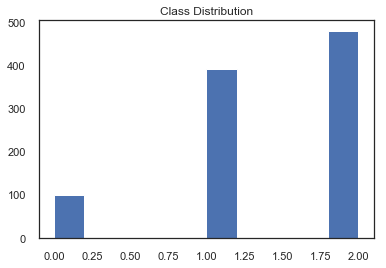

In [11]:
plt.hist(df['Cancer_type'])
plt.title('Class Distribution')
plt.show()

In [12]:
#Cancer_Features = df.iloc[:,2:-1]
good_features = ['MIMAT0019953', 'MIMAT0019810', 'MIMAT0018967', 'MIMAT0025846', 'MIMAT0026636', 'MIMAT0019869', 'MIMAT0018977', 'MIMAT0024615', 'MIMAT0019212', 'MIMAT0004794', 'MIMAT0019064', 'MIMAT0019946', 'MIMAT0022259']
Cancer_Features = df[good_features]


Cancer_Labels = df['Cancer_type']

X = Cancer_Features.values
y = Cancer_Labels.values
#y = np.array(Cancer_Labels.values)

Sample_IDs = list(Cancer_Features.index.values)

print("Feature shape: ")
print(X.shape)
print("Target shape: ")
print(y.shape)
#print(y)

Feature shape: 
(972, 13)
Target shape: 
(972,)


In [15]:
pickle_in = open("pickle_SVC.pkl", "rb")
SVC_model = pickle.load(pickle_in)
prediction_score =  SVC_model.score(X, y)  

print(prediction_score)


0.8713991769547325


In [22]:
pickle_in = open("pickle_RFC.pkl", "rb")
RFC_model = pickle.load(pickle_in)
prediction_score =  RFC_model.score(X, y)  

print(prediction_score)


0.7609402899656619


In [20]:
pickle_in = open("pickle_ETC.pkl", "rb")
ETC_model = pickle.load(pickle_in)
prediction_score =  ETC_model.score(X, y)  

print(prediction_score)


0.941358024691358


In [21]:
pickle_in = open("pickle_SGDC.pkl", "rb")
SGDC_model = pickle.load(pickle_in)
prediction_score =  SGDC_model.score(X, y)  

print(prediction_score)


0.661522633744856


In [23]:
pickle_in = open("pickle_LSVC.pkl", "rb")

LSVC_model = pickle.load(pickle_in)
prediction_score =  LSVC_model.score(X, y)  

print(prediction_score)


0.11316872427983539
